In [2]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [3]:
#initialize h2o
#Running on 4 cores, 8 GB, Macbook Air
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,6 mins 55 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,"21 days, 23 hours and 59 minutes"
H2O cluster name:,H2O_from_python_anmol_t72639
H2O cluster total nodes:,1
H2O cluster free memory:,1.583 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [6]:
#import data from url
url = "http://coursera.h2o.ai/cacao.882.csv"
cacao = h2o.import_file(url)
cacao.tail()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
Zotter,Huiwani Coop,879,2012,0.75,Austria,3,"Criollo, Trinitario",Papua New Guinea
Zotter,El Ceibo Coop,879,2012,0.9,Austria,3.25,,Bolivia
Zotter,Santo Domingo,879,2012,0.7,Austria,3.75,,Dominican Republic
Zotter,"Kongo, Highlands",883,2012,0.68,Austria,3.25,Forastero,Congo
Zotter,"Indianer, Raw",883,2012,0.58,Austria,3.5,,
Zotter,Peru,647,2011,0.7,Austria,3.75,,Peru
Zotter,Congo,749,2011,0.65,Austria,3,Forastero,Congo
Zotter,Kerala State,749,2011,0.65,Austria,3.5,Forastero,India
Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India
Zotter,"Brazil, Mitzi Blue",486,2010,0.65,Austria,3,,Brazil


In [7]:
#dplit data in train, valid, test sets
train,valid,test = cacao.split_frame([0.8,0.1])

In [5]:
train.summary()

,Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
type,enum,enum,int,int,real,enum,real,enum,enum
mins,,,5.0,2006.0,0.42,,1.0,,
mean,,,1044.352528089889,2012.3721910112376,0.7178721910112357,,3.185042134831456,,
maxs,,,1952.0,2017.0,1.0,,5.0,,
sigma,,,550.1300638590474,2.90282276704891,0.0634416567247892,,0.48082807866340227,,
zeros,,,0,0,0,,0,,
missing,0,0,0,0,0,0,0,1,0
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,,Togo
2,A. Morin,Atsane,1676.0,2015.0,0.7,France,3.0,,Togo


In [6]:
#Identify input and target columns
x = ['Maker','REF','Review Date','Cocoa Percent','Rating','Bean Type','Bean Origin']
y = "Maker Location"

In [7]:
#Run Deeplearning with default parameters, takes around 10 seconds
mDL = H2ODeepLearningEstimator(model_id='base_deep_learning_model')
%time mDL.train(x,y,train,validation_frame=valid)
print(mDL.model_performance(test))
mDL.plot()

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 300 ms, sys: 46.3 ms, total: 346 ms
Wall time: 10.6 s

ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.2130104505824934
RMSE: 0.4615305521658273
LogLoss: 1.0013711907061345
Mean Per-Class Error: 0.286732572982573
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.1428571,1 / 7
0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.6666667,2 / 3
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3 / 3
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0 / 71
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0 / 4
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.7912088
2,0.8626374
3,0.8846154
4,0.9010990
5,0.923077
6,0.9285715
7,0.9285715
8,0.9395605
9,0.9395605
10,0.9505495


<Figure size 640x480 with 1 Axes>

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 705 ms, sys: 106 ms, total: 811 ms
Wall time: 50.6 s

ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.10333587075742269
RMSE: 0.3214589721215177
LogLoss: 0.7034893245435792
Mean Per-Class Error: 0.13590222180010914
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.1428571,1 / 7
0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 3
0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 3
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0422535,3 / 71
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0 / 4
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.8901099
2,0.9120879
3,0.9285715
4,0.945055
5,0.945055
6,0.9505495
7,0.9505495
8,0.9615385
9,0.9615385
10,0.9615385


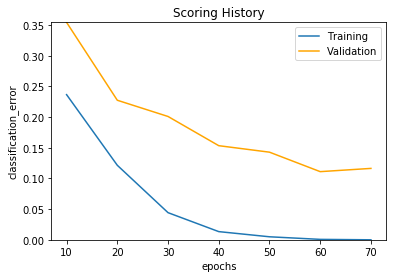

In [8]:
#Takes around 8 times more than baseline model on my machine
#Also, trying to create model with early stopping

#Trying with three hidden layers, takes around 9 times the running time of baseline model
#Also, I tried with increasing number of hidden layers and number of hidden units. But performance didn't improved

#Ultimately, only early stopping helped with stopping rounds as 2 only

mDL_200_epoch = H2ODeepLearningEstimator(epochs=200,stopping_rounds=2,stopping_tolerance=0,stopping_metric="logloss")
%time mDL_200_epoch.train(x,y, train,validation_frame=valid)
print(mDL_200_epoch.model_performance(test))
mDL_200_epoch.plot()

In [9]:
#save base models
model_path = h2o.save_model(model=mDL, path="/tmp/base_deep_learning_model", force=True)
print(model_path)
# load the model
saved_model = h2o.load_model(model_path)

/private/tmp/base_deep_learning_model/base_deep_learning_model


In [10]:
#save other models
model_path = h2o.save_model(model=mDL_200_epoch, path="/tmp/enhanced_deep_model_early_stopping_hidden_layers", force=True)
print(model_path)
# load the model
saved_model = h2o.load_model(model_path)

/private/tmp/enhanced_deep_model_early_stopping_hidden_layers/DeepLearning_model_python_1535651688506_1


In [11]:
h2o.cluster().shutdown()

H2O session _sid_b14b closed.


In [9]:
model_path = "/Users/anmol/tagnos/h2o/m2"
# load the model
saved_model = h2o.load_model(model_path)
saved_model.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 3.333352551593905e-05
RMSE: 0.0057735193353741394
LogLoss: 0.000912228533049817
Mean Per-Class Error: 0.0
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 3
0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 4
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0 / 68
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0 / 3
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0
